In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder

In [5]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [6]:
design.delete_all_components()

In [7]:
design.variables['cpw_width'] = '7 um'#'20 um'
design.variables['cpw_gap'] = '6 um'#'20 um'

In [8]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [9]:
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the defaults
    # (see below for defaults)
    chip = 'main',
   cross_gap = '30um', 
    cross_width = '30um', 
    cross_length= '240um',
    )


xmon_options_1 = dict(pos_x = '-1mm',chip = 'main',
    connection_pads=dict(
        a = dict(connector_location = '180', claw_length = '150um', claw_width = '7um', claw_gap = '6um' ,ground_spacing = '10um'),
    )
)

xmon_options_2 = dict(pos_x = '1mm',  chip = 'main',
    connection_pads=dict(
        b = dict(connector_location = '-180', claw_length = '150um', claw_width = '7um', claw_gap = '6um' , ground_spacing = '10um')
    ),
)

# Create two Transmon Cross objects with names 'Q1' and 'Q2'
q1 = TransmonCrossFL(design, 'Q1', options = xmon_options_1, **options)

In [10]:
gui.rebuild()
gui.autoscale()

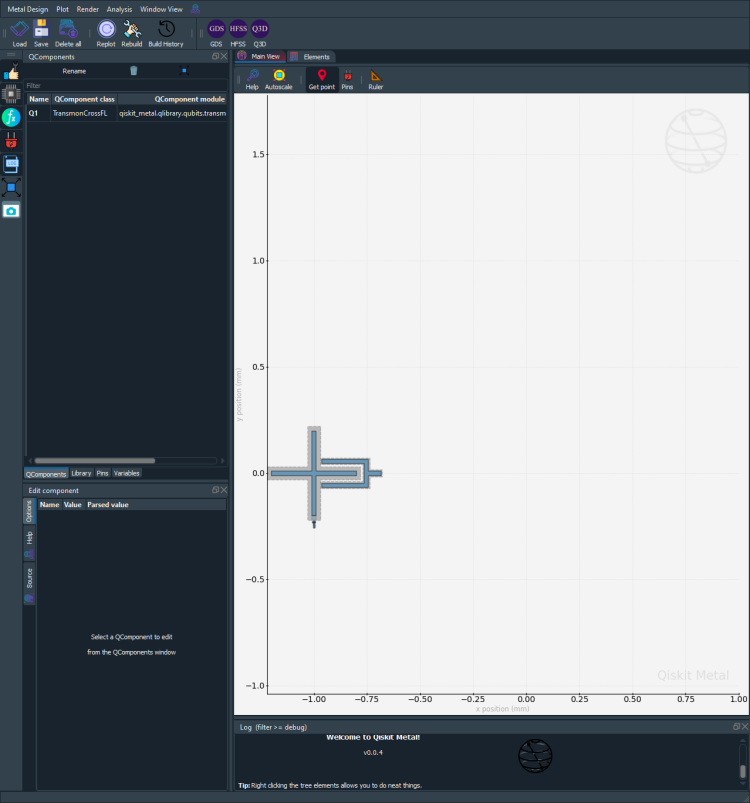

In [10]:
gui.screenshot()

### First qubit

In [11]:
%matplotlib inline

In [12]:

eig_1qb = EPRanalysis(design, "hfss")
hfss1 = eig_1qb.sim.renderer
eig_1qb.sim.setup.max_passes = 6
eig_1qb.sim.setup.max_delta_f = 0.05
eig_1qb.sim.setup.n_modes = 1
eig_1qb.sim.setup.vars.Lj1 = '6.58 nH'
eig_1qb.sim.setup.vars.Cj1 = '2 fF'
# eig_1qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',
#                            Lj2= '9 nH', Cj2= '0 fF')
# eig_1qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF')
eig_1qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.05,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF', 'Lj1': '6.58 nH', 'Cj1': '2 fF'}}

In [13]:
eig_1qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_1qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_1qb.sim.renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [14]:
eig_1qb.sim.run(name="1stTransmon",
                components=[ 'Q1'],  open_terminations=[], box_plus_buffer = False)

INFO 06:20PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:20PM [load_ansys_project]: 	Opened Ansys App
INFO 06:20PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:20PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project4
INFO 06:20PM [connect_design]: 	Opened active design
	Design:    TwoCoupledTransmon_hfss [Solution type: Eigenmode]
INFO 06:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:20PM [connect]: 	Connected to project "Project4" and design "TwoCoupledTransmon_hfss" 😀 

INFO 06:20PM [connect_design]: 	Opened active design
	Design:    1stTransmon_hfss [Solution type: Eigenmode]
INFO 06:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:20PM [analyze]: Analyzing setup Setup
  df = pd.read_csv(io.StringIO(text2[3].strip()),

06:20PM 32s INFO [get_f_convergence]: Saved convergences to D:\Users\lfl\Documents\lflPython\qiskit_meta

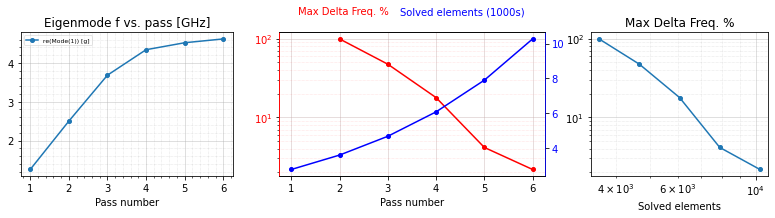

In [15]:
eig_1qb.sim.plot_convergences()

In [16]:
eig_1qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,1.253638
2,2.499292
3,3.683832
4,4.340393
5,4.520209
6,4.618466


INFO 06:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


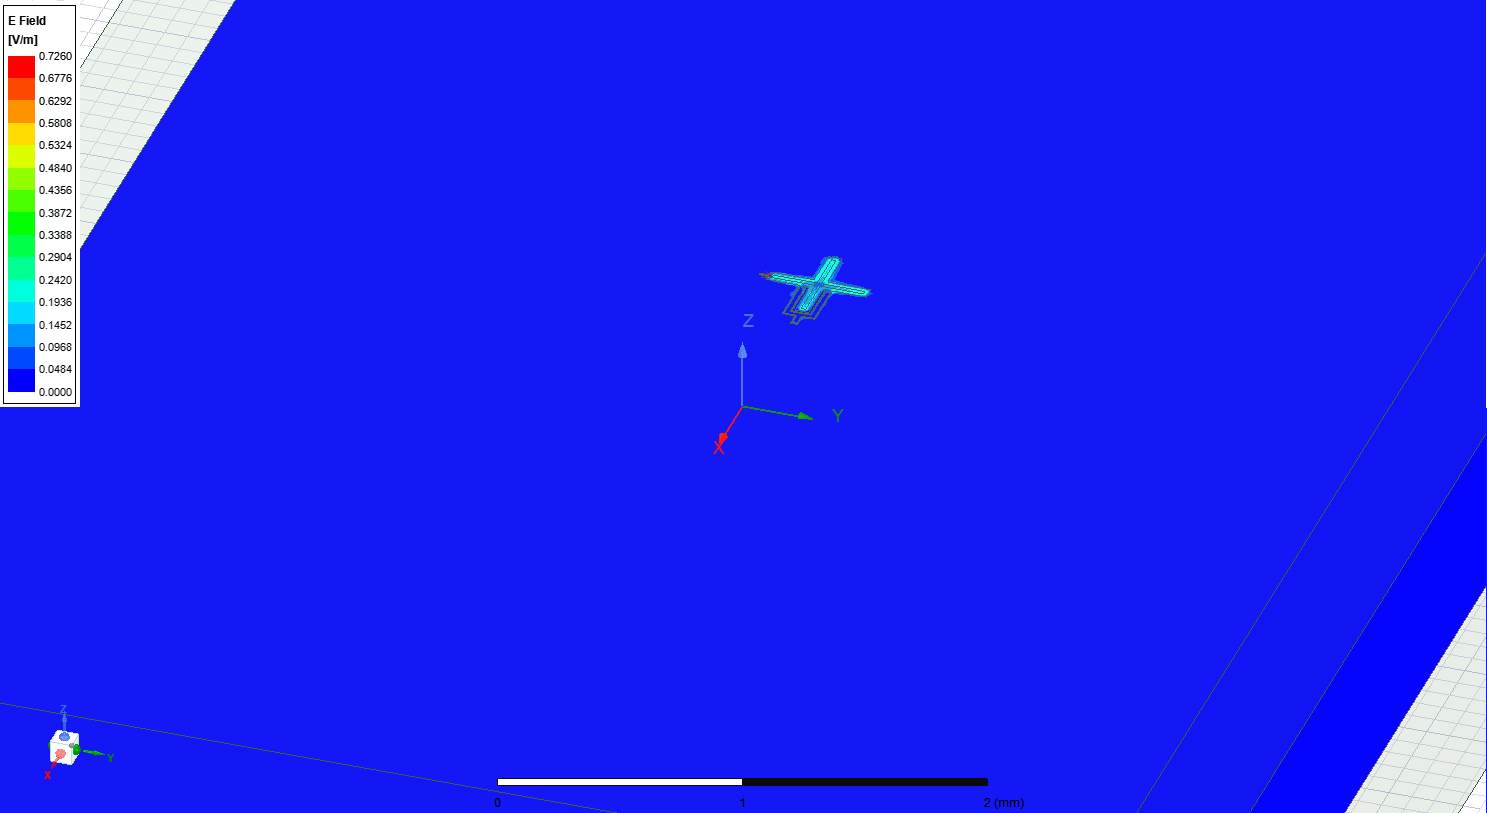

WindowsPath('D:/Users/lfl/Documents/lflPython/qiskit_metal/ansys.png')

In [17]:
eig_1qb.sim.plot_fields('main')
eig_1qb.sim.save_screenshot()

In [18]:
hfss1.start()

INFO 06:20PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:20PM [load_ansys_project]: 	Opened Ansys App
INFO 06:20PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:20PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project4
INFO 06:20PM [connect_design]: 	Opened active design
	Design:    1stTransmon_hfss [Solution type: Eigenmode]
INFO 06:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:20PM [connect]: 	Connected to project "Project4" and design "1stTransmon_hfss" 😀 



True

In [19]:
pinfo1 = hfss1.pinfo

In [20]:
pinfo1.junctions['jj'] = {'Lj_variable': 'Lj1', 'rect': 'JJ_rect_Lj_Q1_rect_jj',
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj1'}
pinfo1.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo1.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

In [21]:
import pyEPR as epr

In [22]:
eprd1 = epr.DistributedAnalysis(pinfo1)

Design "1stTransmon_hfss" info:
	# eigenmodes    1
	# variations    1


In [23]:
ℰ_elec = eprd1.calc_energy_electric()
ℰ_elec_substrate = eprd1.calc_energy_electric(None, 'main')
ℰ_mag = eprd1.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")


ℰ_elec_all       = 1.43082268431302e-24
ℰ_elec_substrate = 1.31013972705531e-24
EPR of substrate = 91.6%

ℰ_mag    = 1.5743279978331e-26



In [24]:
pinfo1.junctions

AttrDict({'jj': {'Lj_variable': 'Lj1', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 'line': 'JJ_Lj_Q1_rect_jj_', 'Cj_variable': 'Cj1'}})

In [25]:
eig_1qb.sim.clear_fields()

In [26]:
eig_1qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': '',
   'line': ''}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [27]:
eig_1qb.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': '1stTransmon', 'components': ['Q1'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



In [28]:
eig_1qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_1qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_1qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

Design "1stTransmon_hfss" info:
	# eigenmodes    1
	# variations    1
Design "1stTransmon_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 1.43082268431302e-24
        energy_elec_substrate = 1.31013972705531e-24
        EPR of substrate = 91.6%

        energy_mag    = 1.5743279978331e-26
        energy_mag % of energy_elec_all  = 1.1%
        

Variation 0  [1/1]

  Mode 0 at 4.62 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.9%  7.154e-25 7.872e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  df = df.drop('Unnamed: 9', 1)



		Energy fraction (Lj over Lj&Cj)= 98.34%
	jj              0.988092  (+)        0.0166411
		(U_tot_cap-U_tot_ind)/mean=0.87%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9156548476755152


  df = pd.read_csv(io.StringIO(text2[3].strip()),

WARNING 06:20PM [__init__]: <p>Error: <class 'IndexError'></p>
INFO 06:20PM [__del__]: Disconnected from Ansys HFSS



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project4\1stTransmon_hfss\2021-12-08 18-20-40.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.01766
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.971918

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       160

*** Chi matrix ND (MHz) 
       172

*** Frequencies O1 PT (MHz)
0    4458.894629
dtype: float64

*** Frequencies ND (MHz)
0    4452.960653
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
eigenmode,
0,4458.89


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
10,0,172.38


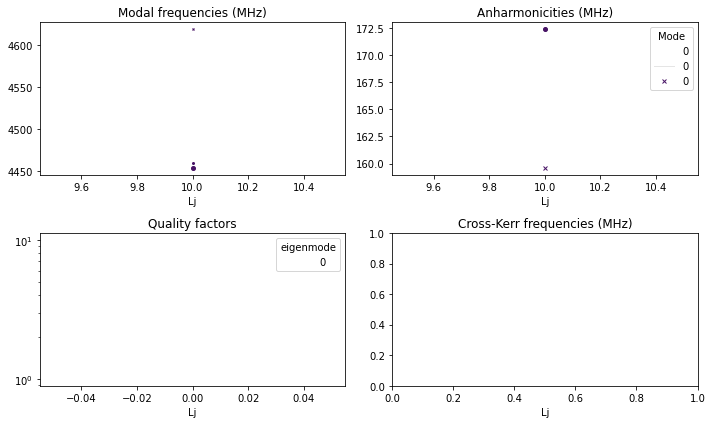

In [29]:
eig_1qb.run_epr()

### add the second qubit to the simulation

In [30]:
eig_1qb.sim.clear_fields()

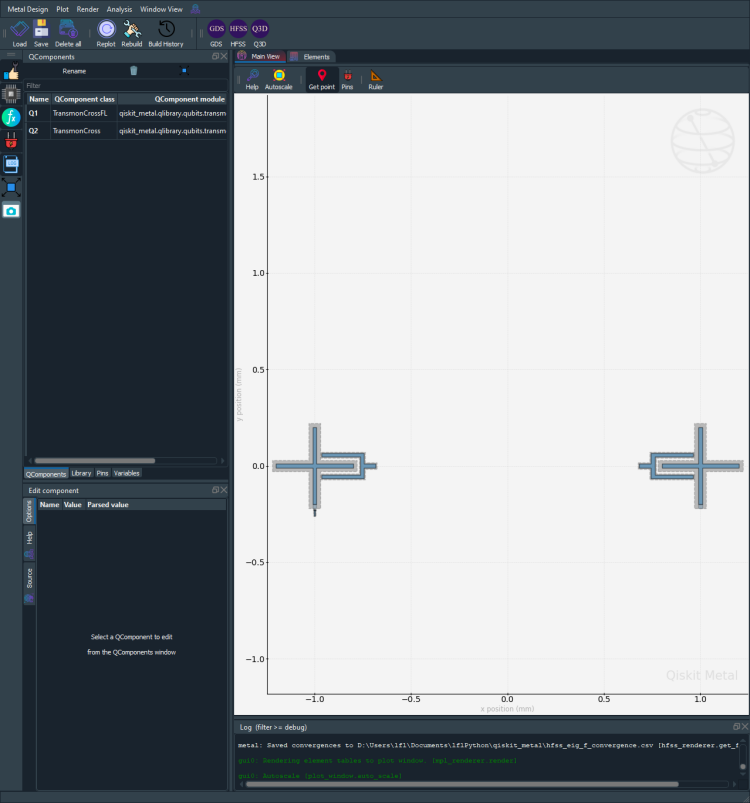

In [31]:
q2 = TransmonCross(design, 'Q2', options = xmon_options_2, **options)
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [32]:
eig_2qb = EPRanalysis(design, "hfss")

In [33]:
eig_2qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [34]:
eig_2qb.sim.setup.max_passes = 6
eig_2qb.sim.setup.max_delta_f = 0.2
eig_2qb.sim.setup.vars.Lj2 = '6.58 nH'
eig_2qb.sim.setup.vars.Cj2 = '2 fF'

eig_2qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.2,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF', 'Lj2': '6.58 nH', 'Cj2': '2 fF'}}

INFO 06:20PM [connect_design]: 	Opened active design
	Design:    2ndTransmon_hfss [Solution type: Eigenmode]
INFO 06:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:20PM [analyze]: Analyzing setup Setup
  df = pd.read_csv(io.StringIO(text2[3].strip()),

06:21PM 09s INFO [get_f_convergence]: Saved convergences to D:\Users\lfl\Documents\lflPython\qiskit_metal\hfss_eig_f_convergence.csv


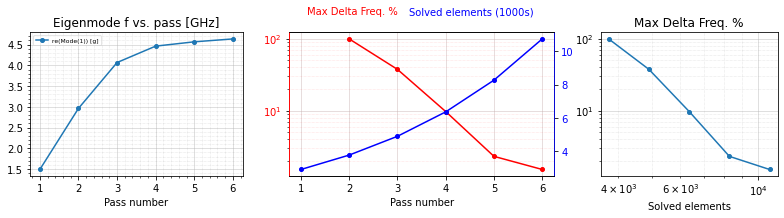

In [35]:
eig_2qb.sim.run(name="2ndTransmon",
                components=[ 'Q2'],  open_terminations=[], box_plus_buffer = False)
eig_2qb.sim.plot_convergences()

In [36]:
eig_2qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,1.489239
2,2.961582
3,4.068250
4,4.463739
5,4.567489
6,4.637322


INFO 06:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


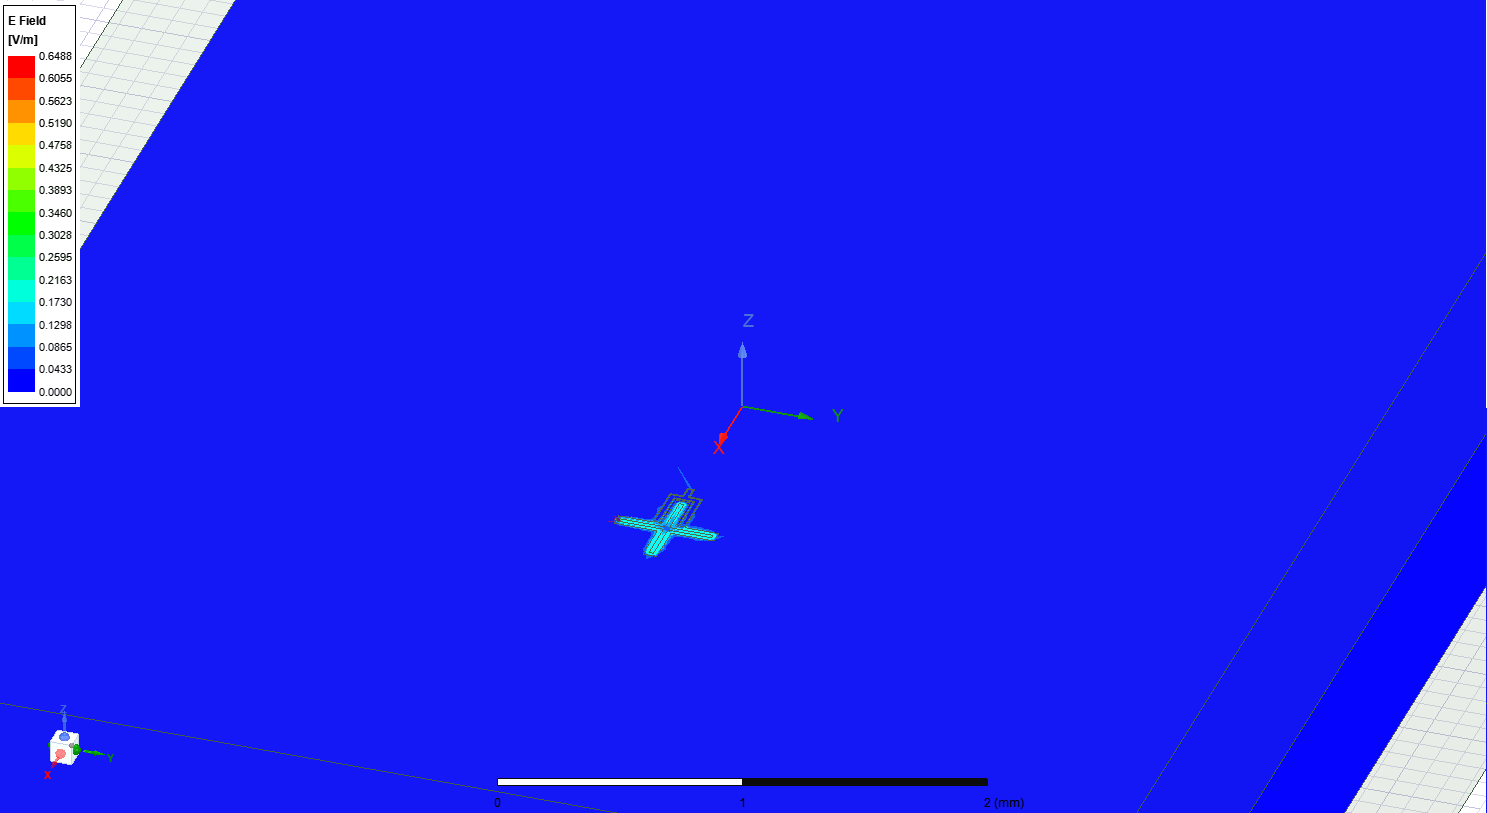

WindowsPath('D:/Users/lfl/Documents/lflPython/qiskit_metal/ansys.png')

In [37]:
eig_2qb.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
eig_2qb.sim.save_screenshot()

In [38]:
eig_2qb.sim.clear_fields()

In [39]:
hfss2 = eig_2qb.sim.renderer
hfss2.start()
pinfo2 = hfss2.pinfo
pinfo2.junctions['jj'] = {'Lj_variable': 'Lj2', 'rect': 'JJ_rect_Lj_Q2_rect_jj',
                             'line': 'JJ_Lj_Q2_rect_jj_',  'Cj_variable': 'Cj2'}
pinfo2.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo2.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

INFO 06:21PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:21PM [load_ansys_project]: 	Opened Ansys App
INFO 06:21PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:21PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project4
INFO 06:21PM [connect_design]: 	Opened active design
	Design:    2ndTransmon_hfss [Solution type: Eigenmode]
INFO 06:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:21PM [connect]: 	Connected to project "Project4" and design "2ndTransmon_hfss" 😀 



In [40]:
eig_2qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q2_rect_jj'
eig_2qb.setup.junctions.jj.line = 'JJ_Lj_Q2_rect_jj_'
eig_2qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

Design "2ndTransmon_hfss" info:
	# eigenmodes    1
	# variations    1
Design "2ndTransmon_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 1.41909668884498e-24
        energy_elec_substrate = 1.3045732939838e-24
        EPR of substrate = 91.9%

        energy_mag    = 1.77873467019564e-26
        energy_mag % of energy_elec_all  = 1.3%
        

Variation 0  [1/1]

  Mode 0 at 4.64 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  7.095e-25 8.894e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  df = df.drop('Unnamed: 9', 1)



		Energy fraction (Lj over Lj&Cj)= 98.33%
	jj              0.987967  (+)        0.0167752
		(U_tot_cap-U_tot_ind)/mean=0.81%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9192983848377576


  df = pd.read_csv(io.StringIO(text2[3].strip()),

WARNING 06:21PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project4\2ndTransmon_hfss\2021-12-08 18-21-14.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.016369
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.971667

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       160

*** Chi matrix ND (MHz) 
       173

*** Frequencies O1 PT (MHz)
0    4476.935163
dtype: float64

*** Frequencies ND (MHz)
0    4470.974603
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
eigenmode,
0,4476.94


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
10,0,173.25


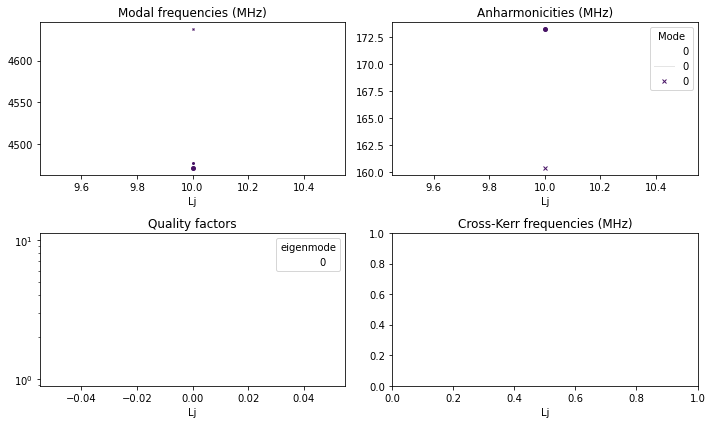

In [41]:
eig_2qb.run_epr()

### add the bus coupler

In [42]:
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

In [43]:
options = Dict(
        lead=Dict(
            chip = 'main',
            start_straight='0.2mm',
            end_straight='0.2mm'),
        trace_gap='9um',
        trace_width='20um')

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='89um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        chip = 'main',
        fillet=fillet,
        hfss_wire_bonds = False,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym = 140
cpw1 = connect('cpw1', 'Q1', 'a', 'Q2', 'b', '6.0 mm', f'+{asym}um')




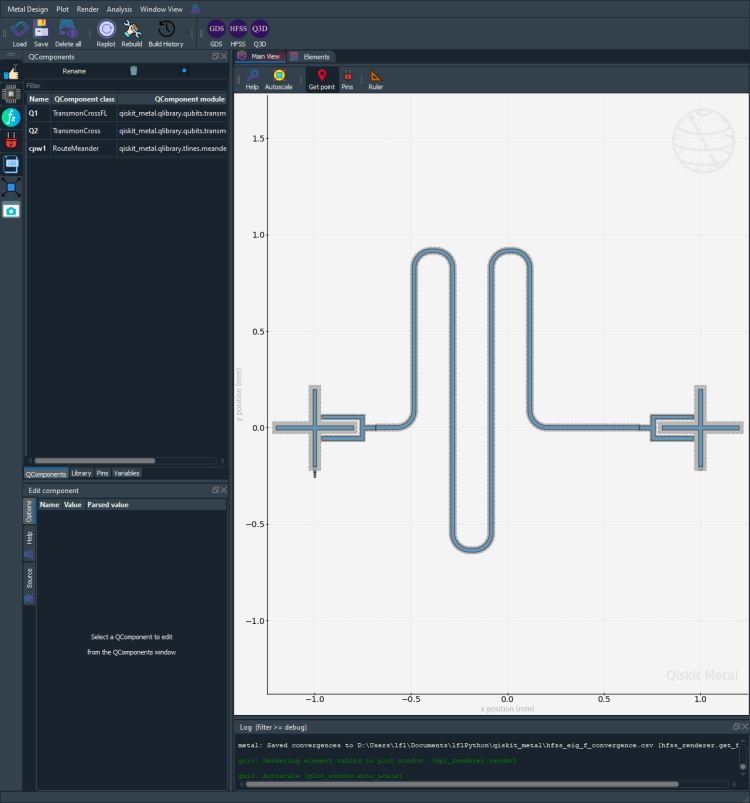

In [44]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [45]:
eig_bus = EPRanalysis(design, "hfss")

INFO 06:21PM [connect_design]: 	Opened active design
	Design:    cpw1_hfss [Solution type: Eigenmode]
INFO 06:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:21PM [analyze]: Analyzing setup Setup
  df = pd.read_csv(io.StringIO(text2[3].strip()),

06:21PM 40s INFO [get_f_convergence]: Saved convergences to D:\Users\lfl\Documents\lflPython\qiskit_metal\hfss_eig_f_convergence.csv


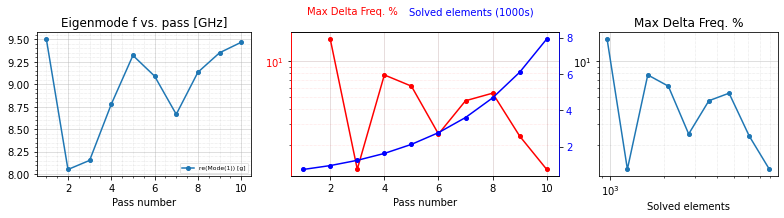

In [46]:
eig_bus.sim.run(name="cpw1",
               components=['cpw1'],
               open_terminations=[('cpw1', 'start'), ('cpw1', 'end')])
eig_bus.sim.plot_convergences()

In [47]:
eig_bus.get_frequencies()

Design "cpw1_hfss" info:
	# eigenmodes    1
	# variations    1
Design "cpw1_hfss" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,9.469083,inf


In [48]:
eig_bus.sim.plot_fields('main')

INFO 06:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


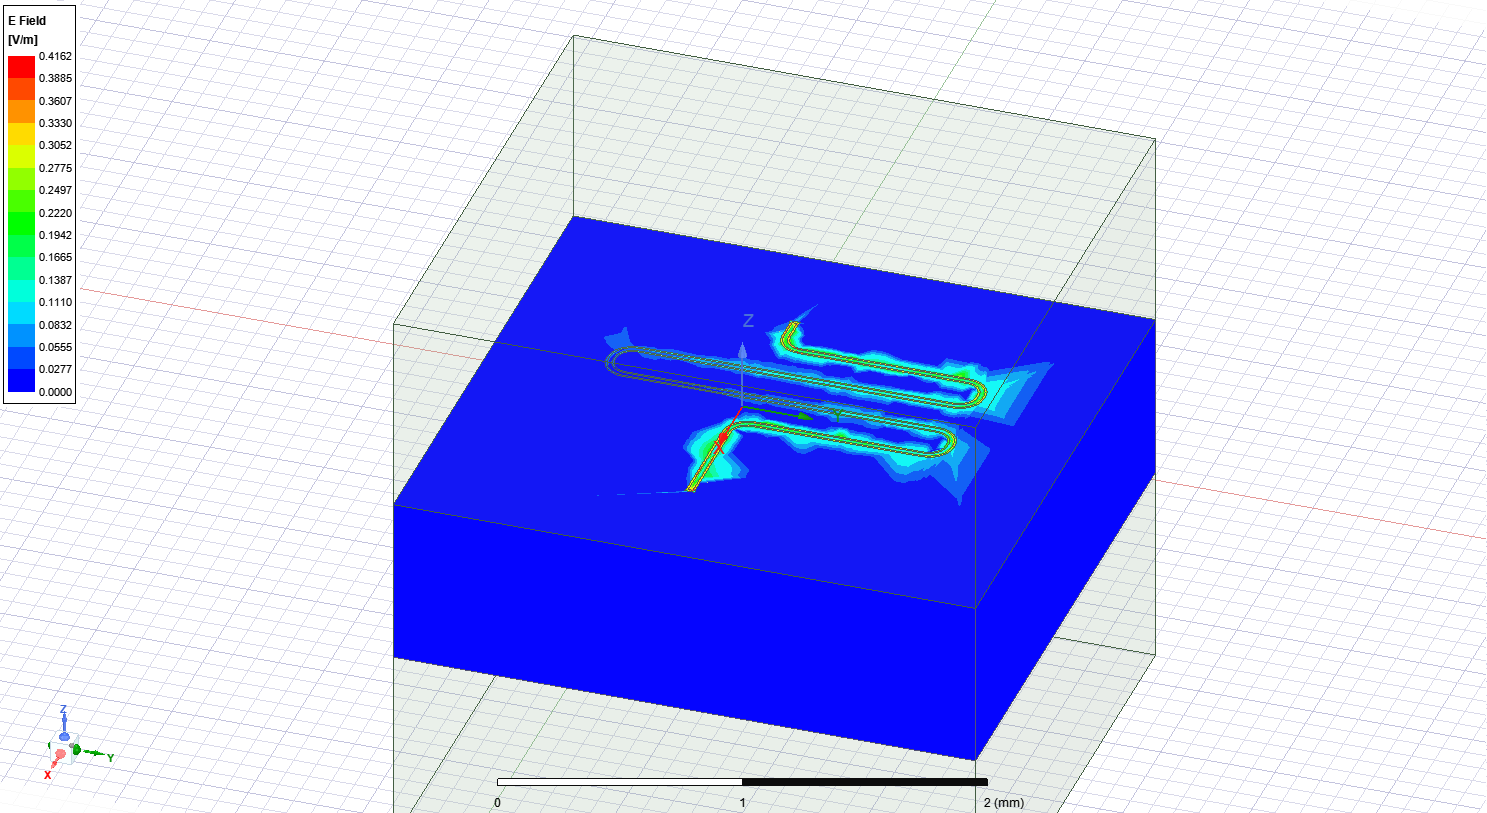

WindowsPath('D:/Users/lfl/Documents/lflPython/qiskit_metal/ansys.png')

In [49]:
eig_bus.sim.save_screenshot()

In [50]:
eig_bus.run_epr(no_junctions = True)

Design "cpw1_hfss" info:
	# eigenmodes    1
	# variations    1
Design "cpw1_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 9.17123055804218e-24
        energy_elec_substrate = 8.2777021139821e-24
        EPR of substrate = 90.3%

        energy_mag    = 9.17622760506791e-24
        energy_mag % of energy_elec_all  = 100.1%
        


### The whole system

In [51]:
design.delete_all_components()

In [52]:
q1 = TransmonCrossFL(design, 'Q1', options = xmon_options_1, **options)
q2 = TransmonCross(design, 'Q2', options = xmon_options_2, **options)
cpw1 = connect('cpw1', 'Q1', 'a', 'Q2', 'b', '6.0 mm', f'+{asym}um')

In [53]:
gui.rebuild()
gui.autoscale()

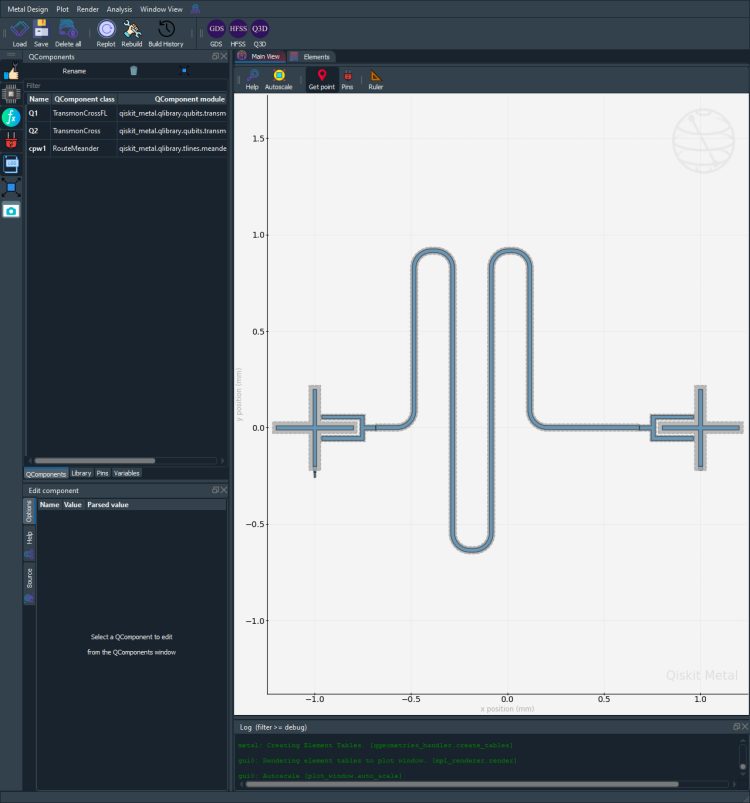

In [54]:
gui.screenshot()

In [55]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,4,rect_jj,"LINESTRING (-1.00000 -0.20000, -1.00000 -0.22000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
1,5,rect_jj,"LINESTRING (1.00000 -0.20000, 1.00000 -0.22000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction


In [56]:
qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

In [57]:
eig_all = EPRanalysis(design, "hfss")

In [58]:
hfss_all = eig_all.sim.renderer

In [61]:
eig_all.sim.setup.max_passes = 15
eig_all.sim.setup.max_delta_f = 0.05
eig_all.sim.setup.n_modes = 2
eig_all.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',
                           Lj2= '9 nH', Cj2= '0 fF')
eig_all.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.05,
 'max_passes': 15,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '13 nH', 'Cj1': '0 fF', 'Lj2': '9 nH', 'Cj2': '0 fF'}}

In [62]:
eig_all.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_all.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_all.sim.renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

INFO 06:23PM [connect_design]: 	Opened active design
	Design:    TwoCoupledTransmon_hfss [Solution type: Eigenmode]
INFO 06:24PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:24PM [analyze]: Analyzing setup Setup
  df = pd.read_csv(io.StringIO(text2[3].strip()),

06:31PM 34s INFO [get_f_convergence]: Saved convergences to D:\Users\lfl\Documents\lflPython\qiskit_metal\hfss_eig_f_convergence.csv


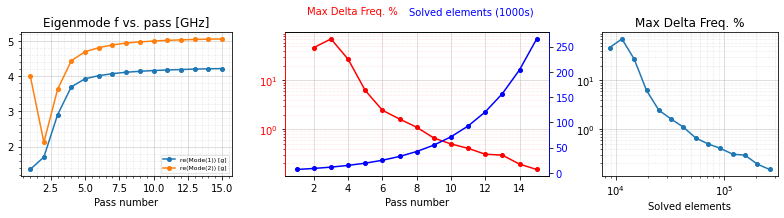

In [64]:
eig_all.sim.run(name="TwoCoupledTransmon",
                 components=['cpw1', 'Q1', 'Q2'],
                 open_terminations=[])
eig_all.sim.plot_convergences()

In [65]:
eig_all.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,1.348398,4.020038
2,1.702007,2.120659
3,2.905676,3.627673
4,3.696848,4.439696
5,3.926987,4.695877
6,4.015186,4.811076
7,4.072312,4.888940
8,4.112895,4.942662
9,4.139692,4.975320


In [72]:
eig_all.sim.plot_fields('main')  

INFO 07:59PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


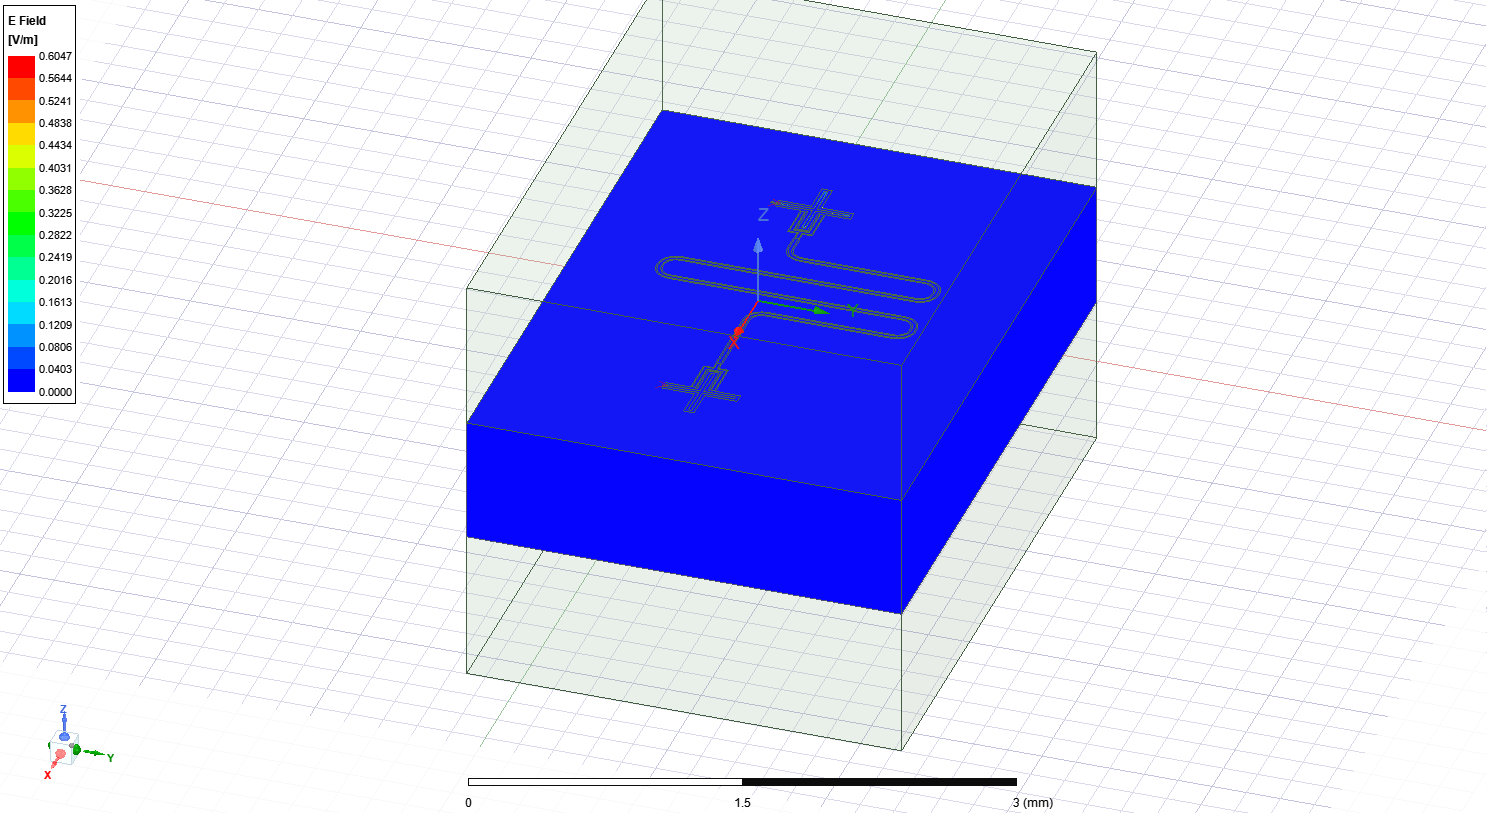

WindowsPath('D:/Users/lfl/Documents/lflPython/qiskit_metal/ansys.png')

In [73]:
eig_all.sim.save_screenshot()

In [59]:
hfss_all.start()

INFO 06:23PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:23PM [load_ansys_project]: 	Opened Ansys App
INFO 06:23PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:23PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project4
INFO 06:23PM [connect_design]: 	Opened active design
	Design:    cpw1_hfss [Solution type: Eigenmode]
INFO 06:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:23PM [connect]: 	Connected to project "Project4" and design "cpw1_hfss" 😀 



True

In [67]:
del eig_all.setup.junctions['jj']

In [69]:
eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')
eig_all.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                  Lj_variable='Lj2', Cj_variable='Cj2')
eig_all.setup.sweep_variable = 'Lj1'
eig_all.setup

{'junctions': {'jj1': {'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_',
   'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1'},
  'jj2': {'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_',
   'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

In [ ]:
eig_all.setup

In [ ]:
del eig_2qb.setup.junctions['jj']

In [ ]:
eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')
eig_all.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                  Lj_variable='Lj2', Cj_variable='Cj2')
eig_all.setup.sweep_variable = 'Lj1'
eig_all.setup

Design "TwoCoupledTransmon_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TwoCoupledTransmon_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 8.69620578163465e-26
        energy_elec_substrate = 8.0116320583898e-26
        EPR of substrate = 92.1%

        energy_mag    = 9.90056173141678e-28
        energy_mag % of energy_elec_all  = 1.1%
        

Variation 0  [1/1]

  Mode 0 at 4.22 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.9%  4.348e-26  4.95e-28

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.21%
	jj1             0.987873  (+)        0.0180302
		Energy fraction (Lj over Lj&Cj)= 98.75%
	jj2             1.68933e-05  (+)        2.13459e-07
		(U_tot_cap-U_tot_ind)/mean=0.93%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectr

  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



p_dielectric_main_1 = 0.9214712741781245


WARNING 07:58PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project4\TwoCoupledTransmon_hfss\2021-12-08 19-58-31.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.018879
1    1.019307
dtype: float64

Pm_norm idx =
     jj1    jj2
0   True  False
1  False   True
*** P (participation matrix, not normlz.)
        jj1       jj2
0  0.970376  0.000017
1  0.000022  0.964160

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1      1
1      1      1
*** P (participation matrix, normalized.)
      0.99  1.7e-05
   2.2e-05     0.98

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       173   0.0142
    0.0142      170

*** Chi matrix ND (MHz) 
       189   0.0215
    0.0215      183

*** Frequencies O1 PT (MHz)
0    4044.004134
1    4889.636179
dtype: float64

*** Frequencies ND (MHz)
0    4036.259342
1    4883.53541

#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
eigenmode,
0,4044.00
1,4889.64


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1
Lj1                  
13  0  189.29    0.02
    1    0.02  183.37

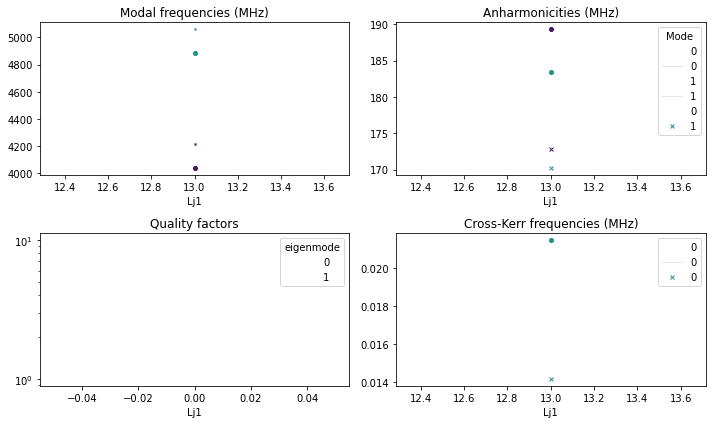

In [70]:
eig_all.run_epr()

### LOM analysis

In [74]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [77]:
q3d = c1.sim.renderer

In [78]:
q3d.start()

INFO 08:09PM [connect_project]: Connecting to Ansys Desktop API...
INFO 08:09PM [load_ansys_project]: 	Opened Ansys App
INFO 08:09PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 08:09PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project4
INFO 08:09PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 08:09PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:09PM [connect]: 	Connected to project "Project4" and design "Design_q3d" 😀 



True

In [79]:
q3d.activate_ansys_design("TwoCoupledTransmon_q3d", 'capacitive')

08:09PM 46s WARNING [activate_ansys_design]: The design_name=TwoCoupledTransmon_q3d was not in active project.  Designs in active project are: 
['2CoupledQubits', 'Dissipator_hfss', 'TwoTransmons_hfss', 'Design_q3d', 'TwoCoupledTransmon_hfss', '2ndTransmon_hfss', 'cpw1_hfss', '1stTransmon_hfss'].  A new design will be added to the project.  
INFO 08:09PM [connect_design]: 	Opened active design
	Design:    TwoCoupledTransmon_q3d [Solution type: Q3D]
WARNING 08:09PM [connect_setup]: 	No design setup detected.
WARNING 08:09PM [connect_setup]: 	Creating Q3D default setup.
INFO 08:09PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [83]:
c1.sim.setup.max_passes = 6
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

c1.sim.run(components=['Q2'], open_terminations=[ ('Q2', 'b')])
c1.sim.capacitance_matrix

INFO 08:13PM [__del__]: Disconnected from Ansys HFSS
INFO 08:13PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 08:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:13PM [analyze]: Analyzing setup Setup
INFO 08:14PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpt1ujaz_5.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:14PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpgx81lbk7.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:14PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp9dh7kz5m.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:14PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpw4dvay1x.txt, C, , Setup:AdaptivePass, "O

,b_connector_arm_Q2,cross_Q2
b_connector_arm_Q2,109.86002,-7.75554
cross_Q2,-7.75554,104.46881


In [84]:
c12 = LOManalysis(design, "q3d")
c12.sim.run(components=['Q2','Q1','cpw1'])
c12.sim.capacitance_matrix

INFO 08:15PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 08:15PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:15PM [analyze]: Analyzing setup Setup
INFO 08:18PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpj5vi7ic2.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:18PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpx8ln_ky4.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:18PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpl0tn_c6x.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:18PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpzcvz9s2z.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxw

,a_connector_arm_Q1,cross_Q1,cross_Q2
a_connector_arm_Q1,1308.29598,-8.27266,-8.17967
cross_Q1,-8.27266,108.95964,-0.00409
cross_Q2,-8.17967,-0.00409,108.96167
